In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5371,5372,15580701,Ma,712,France,Male,33,3,153819.58,1,1,0,79176.09,1
9080,9081,15620443,Fiorentino,711,France,Female,81,6,0.00,2,1,1,72276.24,0
1938,1939,15594902,Lombardi,518,France,Male,38,3,90957.81,1,0,1,162304.59,0
6802,6803,15700656,Balashova,662,France,Male,32,9,0.00,2,0,0,65089.38,0
9548,9549,15758513,McDonald,569,France,Male,43,7,0.00,2,1,0,52534.81,0


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

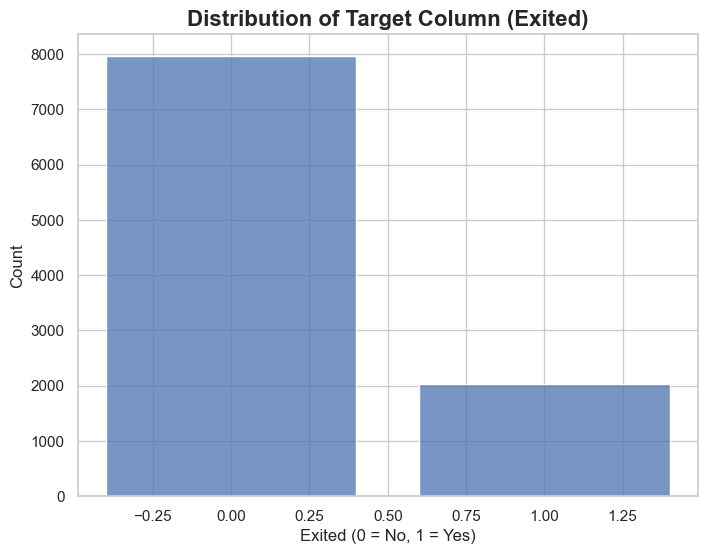

In [7]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=df['Exited'], bins=2, discrete=True, shrink=0.8, 
             palette="viridis", kde=False)


plt.title('Distribution of Target Column (Exited)', fontsize=16, weight='bold')
plt.xlabel('Exited (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


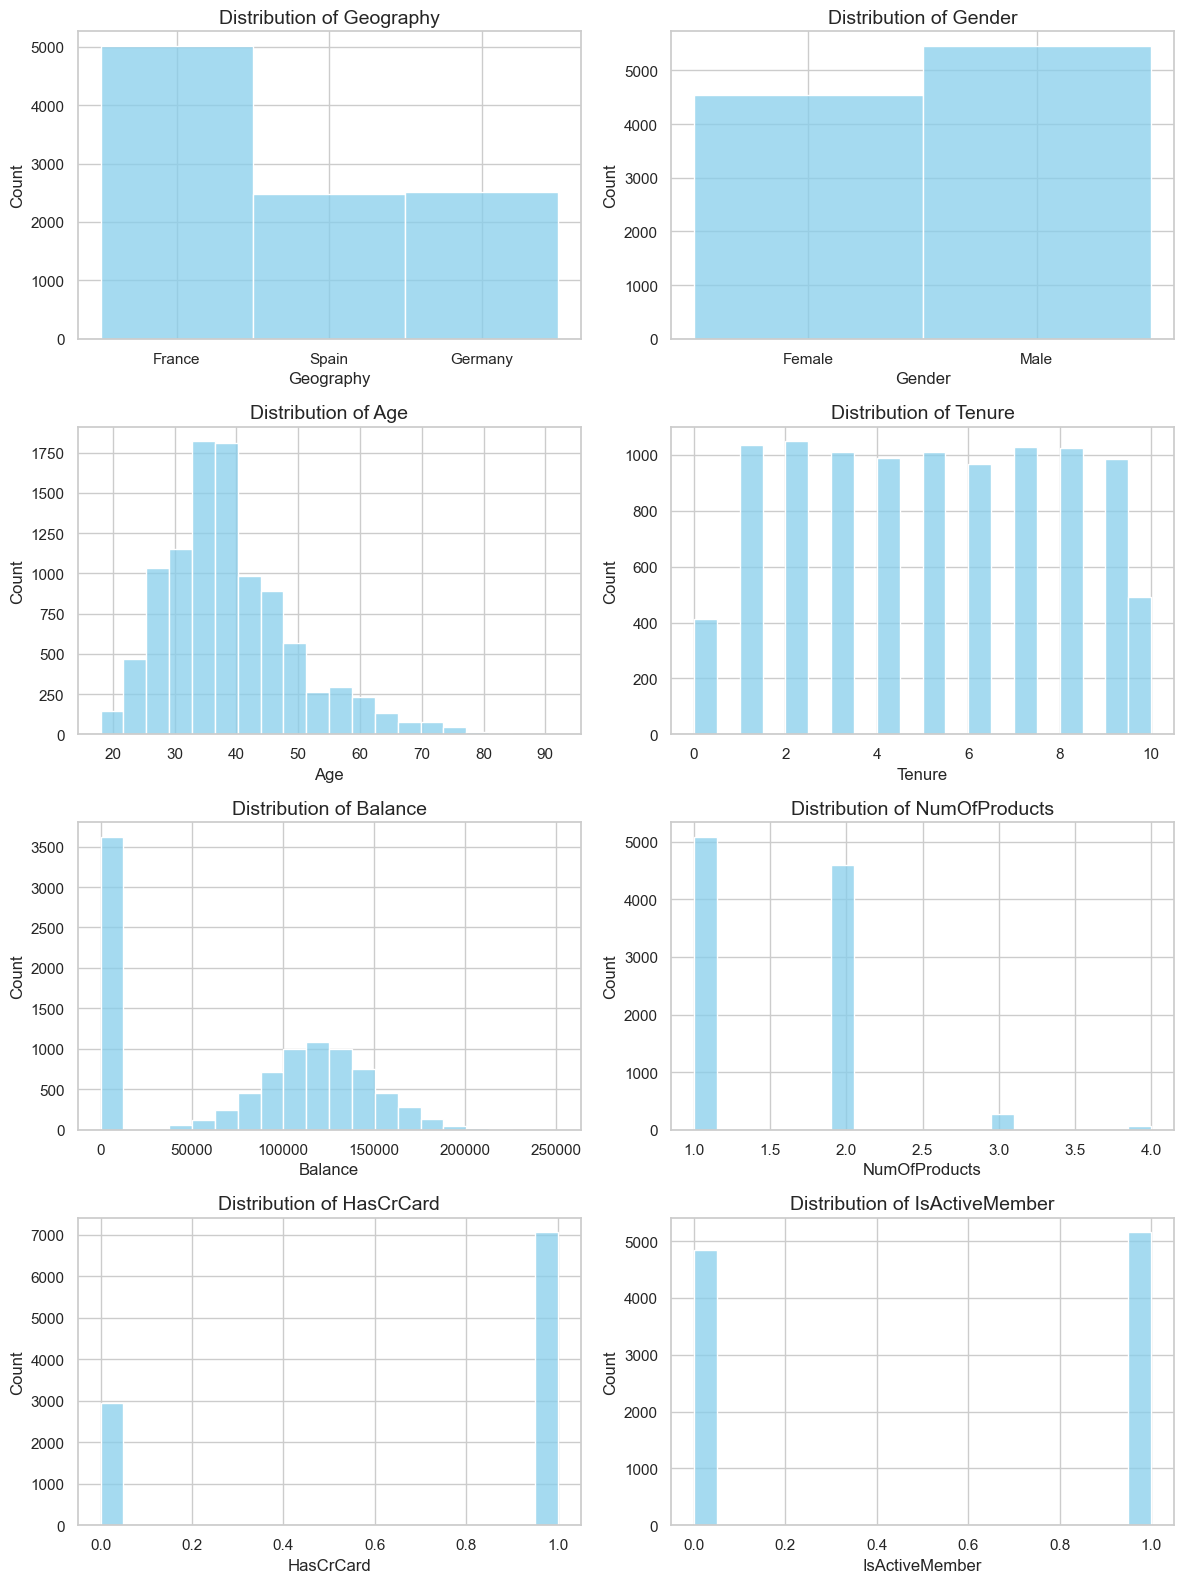

In [8]:
columns_to_plot = ['Geography', 'Gender', 'Age', 'Tenure', 'Balance', 
                   'NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

# Iterate over each column and plot
for i, col in enumerate(columns_to_plot):
    sns.histplot(data=df, x=col, ax=axes[i], kde=False, bins=20, color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

In [9]:
df['Geography'].unique()
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

df = df.astype(int)

# Display the result
print(df.head())

   CreditScore  Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0          619   42       2        0              1          1   
1          608   41       1    83807              1          0   
2          502   42       8   159660              3          1   
3          699   39       1        0              2          0   
4          850   43       2   125510              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1           101348       1                  0   
1               1           112542       0                  0   
2               0           113931       1                  0   
3               0            93826       0                  0   
4               1            79084       0                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2                0            0  
3                0            0  
4                1            0  


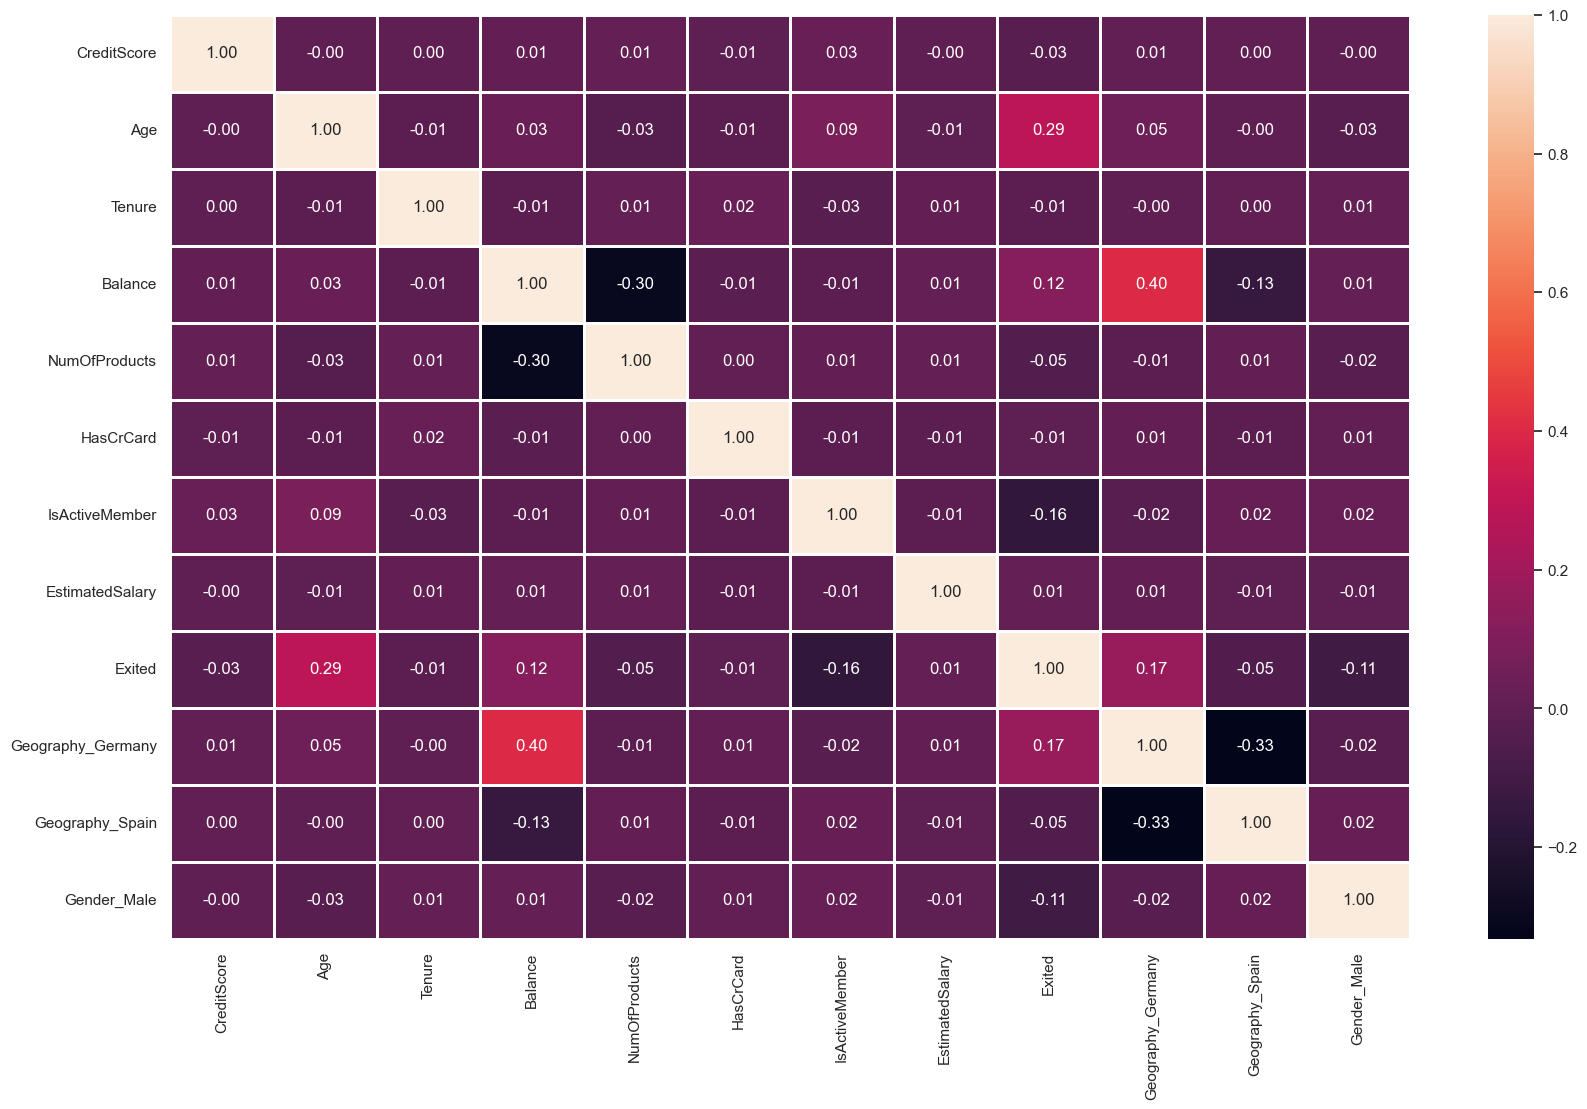

In [11]:
plt.figure(figsize = (20, 12))

corr = df.corr()

sns.heatmap(corr, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [52]:
from tensorflow.keras.utils import to_categorical

X = df.drop('Exited', axis = 1)
y = to_categorical(df.Exited)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
X_train.shape

(7500, 11)

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (11, )))
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())
model.add(Dense(11, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())
model.add(Dense(2, kernel_initializer = 'normal', activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_split = 0.20, validation_data = (X_test, y_test), epochs = 25)


Epoch 1/25
235/235 [==============================] - 2s 2ms/step - loss: 0.6044 - accuracy: 0.6893 - val_loss: 0.5202 - val_accuracy: 0.8076
Epoch 2/25
235/235 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8105 - val_loss: 0.3963 - val_accuracy: 0.8328
Epoch 3/25
235/235 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8303 - val_loss: 0.3504 - val_accuracy: 0.8512
Epoch 4/25
235/235 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8317 - val_loss: 0.3386 - val_accuracy: 0.8620
Epoch 5/25
235/235 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.8371 - val_loss: 0.3381 - val_accuracy: 0.8620
Epoch 6/25
235/235 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8407 - val_loss: 0.3354 - val_accuracy: 0.8628
Epoch 7/25
235/235 [==============================] - 0s 2ms/step - loss: 0.3755 - accuracy: 0.8412 - val_loss: 0.3292 - val_accuracy: 0.8664
Epoch 

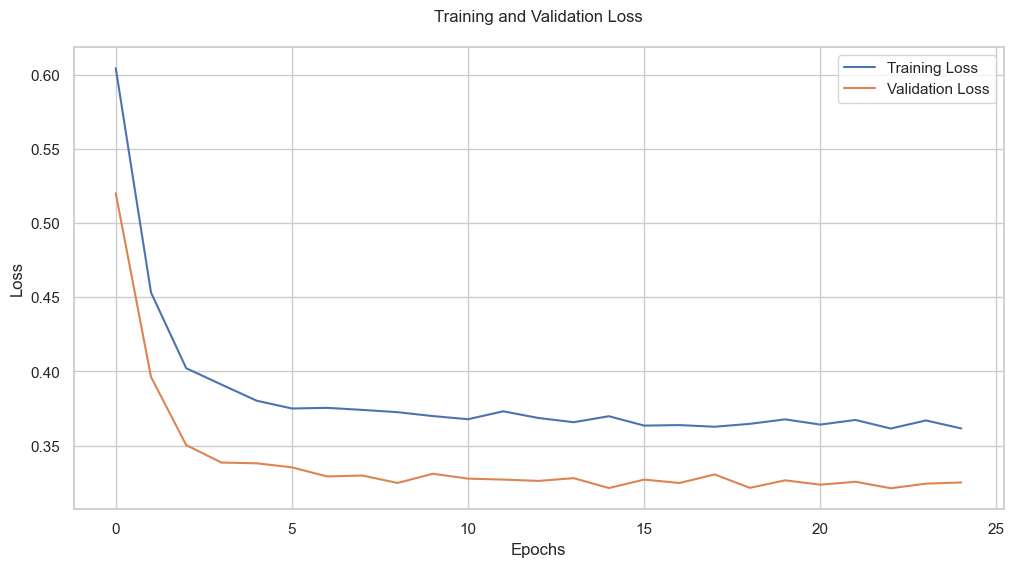

In [61]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 24)
sns.lineplot(train_loss, label = 'Training Loss')
sns.lineplot(val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [64]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')


79/79 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8656
Accuracy of model is 0.8655999898910522


In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                120       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 batch_normalization_4 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 11)                121       
                                                                 
 dropout_5 (Dropout)         (None, 11)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 11)               44        
 hNormalization)                                      